# Import Libraries

In [13]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

#problem statement

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [14]:
#importing the csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [15]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# EDA: Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
#check for the null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# > Data processing

In [6]:
#lets check the unique values in column 'station'
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

By observing the whole data set we came to know that there are 25 stations and the data is collected from each of the stations every day.

station and Date columns having null values at the very last, and null values in station is present after 25, which means this data is collected from next date.

In [16]:
# Lets replace the null values in ststion column, considering it as from next day
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2

In [17]:
#lets replace null values in 'Date' columns with next date of 30-08-2017
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [19]:
#lets have a look on random rows of this datasetafter updating
df.sample(n=5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
6467,18.0,10-07-2017,25.8,23.4,64.636276,92.857582,29.007960,22.884820,6.615913,83.706944,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.2313,5783.118164,32.4,22.6
2970,21.0,25-08-2014,27.9,24.0,49.490826,84.210579,30.124511,22.977020,7.187325,49.876592,...,0.000000,0.000000,5.425840,37.5507,127.040,26.2980,0.5721,4649.458496,29.5,21.8
1986,12.0,17-07-2014,28.3,21.9,83.207649,94.583504,25.236308,22.842323,7.638874,44.705332,...,5.481769,0.762481,0.007825,37.5507,126.988,132.1180,0.5931,5751.119141,30.9,20.1
1210,11.0,17-08-2013,34.1,27.4,52.632408,90.389832,31.945402,26.882635,8.855688,62.788879,...,0.000000,0.000688,0.241668,37.5372,127.085,28.7000,0.6233,4942.246582,34.2,27.5
1052,3.0,11-08-2013,33.2,24.2,39.898037,83.159859,35.541255,27.975176,6.565028,13.898664,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5127.352051,33.9,26.8


By some observations I realize that this dataset is orderly arranged by 'Date' & 'station' columns and it will create problem while cross validation. So I will shuffle the dataset for better results.

In [20]:
#lets shuffle the dataset
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True)
df

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1671,22.0,04-07-2014,32.0,22.1,40.373344,75.411598,31.461545,23.035499,6.070740,...,0.000000,0.109230,0.018762,37.5102,127.086,21.9668,0.1332,5827.829590,30.7,22.4
1,6649,25.0,17-07-2017,29.4,26.3,56.051205,83.914566,31.659014,24.505625,6.096507,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.2713,5684.274902,30.6,23.8
2,2019,20.0,18-07-2014,30.1,22.5,60.718620,99.627533,30.264472,22.565811,8.261650,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.7296,5751.265137,30.3,23.9
3,2361,12.0,01-08-2014,32.4,22.5,44.165474,79.157578,34.854871,26.726644,12.957286,...,0.001973,0.000000,0.538713,37.5507,126.988,132.1180,0.5931,5453.363281,33.1,26.6
4,3342,18.0,09-07-2015,31.3,22.7,43.211609,82.235390,32.873656,23.556445,5.629042,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.2313,5794.006836,35.5,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,3423,24.0,12-07-2015,27.9,24.5,80.050133,93.031906,25.482809,22.778826,13.399558,...,0.324213,0.026706,1.561965,37.5237,126.909,17.2956,0.2223,5746.661133,25.5,21.5
7748,2957,8.0,25-08-2014,28.4,24.1,50.845131,75.892586,29.273135,23.474413,7.012365,...,0.000000,0.000000,0.000953,37.4697,126.910,52.5180,1.5629,4634.482910,30.0,22.4
7749,7591,17.0,24-08-2017,28.0,24.5,37.780262,97.158783,29.697243,21.106405,5.509499,...,0.000000,0.000000,0.000000,37.6181,127.099,53.4712,0.6970,4691.812988,30.1,17.6
7750,6611,12.0,16-07-2017,28.1,21.9,65.016365,87.559746,30.227363,25.430507,7.254555,...,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5766.102051,29.1,22.5


In [21]:
#lets drop the index column and since we know the latitude and longitude just indicates geographical conditions, so we will drop these two columns
df.drop(columns = ['index','lat','lon'], inplace = True)

In [22]:
#lets replace all the null values with median of that column
for col in df.columns:
    if col not in ['station','Date']:
        df[col] = df[col].replace(np.nan, df[col].median())

In [23]:
#now check for null values again
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [24]:
#lets convert data type of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].value_counts()

2015-01-08    25
2016-08-08    25
2014-12-07    25
2017-06-07    25
2017-08-25    25
              ..
2015-07-26    25
2014-08-22    25
2017-07-28    25
2013-08-08    25
2017-08-31     2
Name: Date, Length: 311, dtype: int64

# Data Visualization

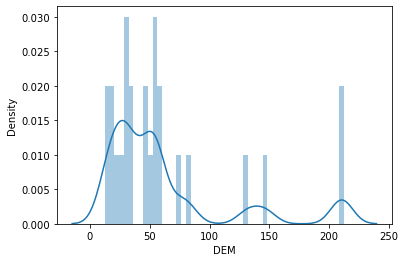

In [29]:
#lets have a look on destribution of DEM
sns.distplot( df['DEM'])
plt.show()

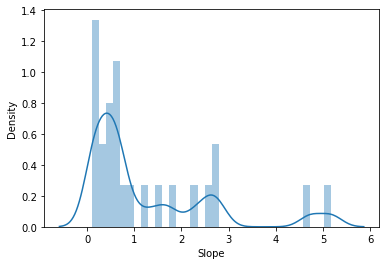

In [30]:
#check the distribution of slope
sns.distplot(df['Slope'])
plt.show()

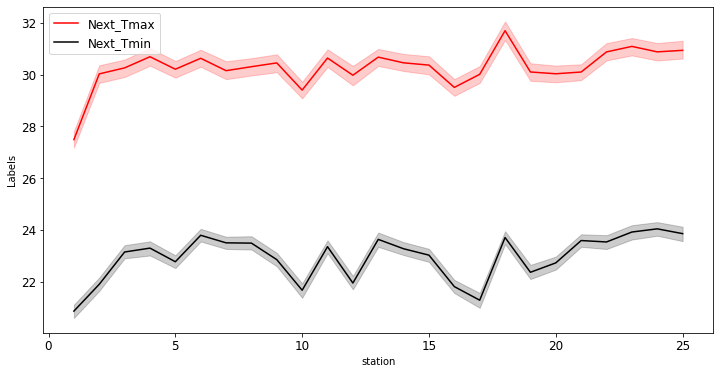

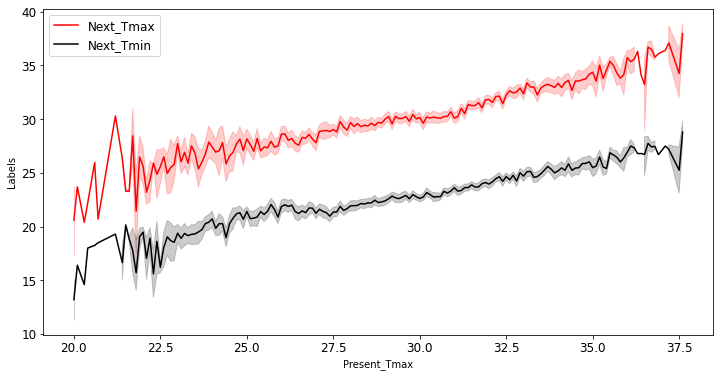

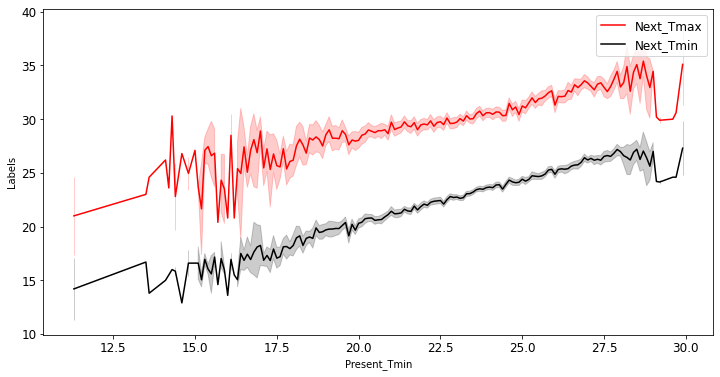

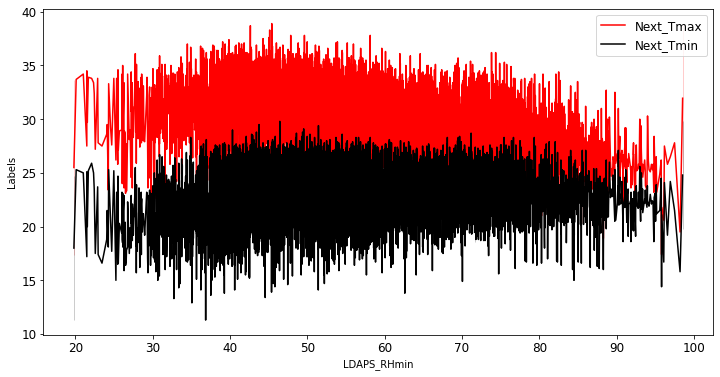

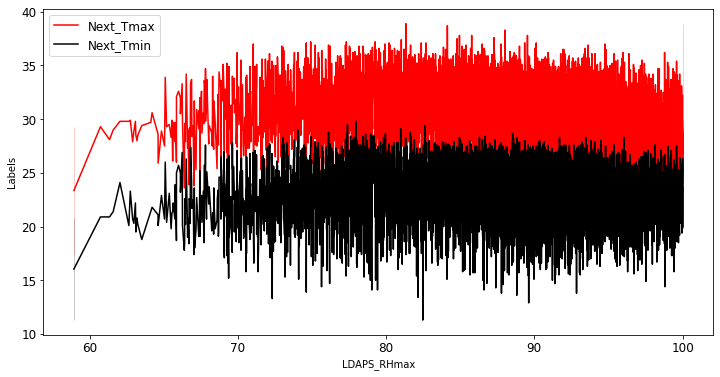

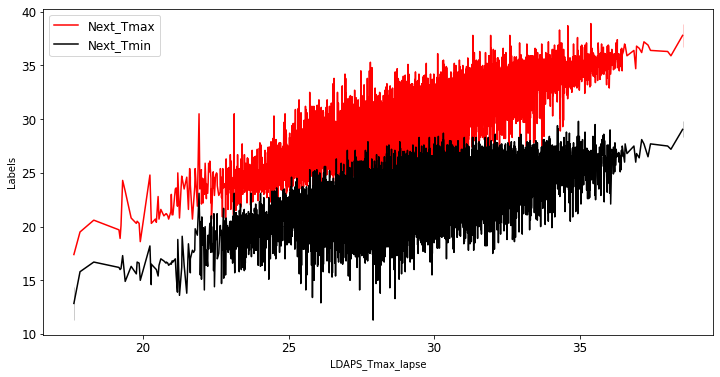

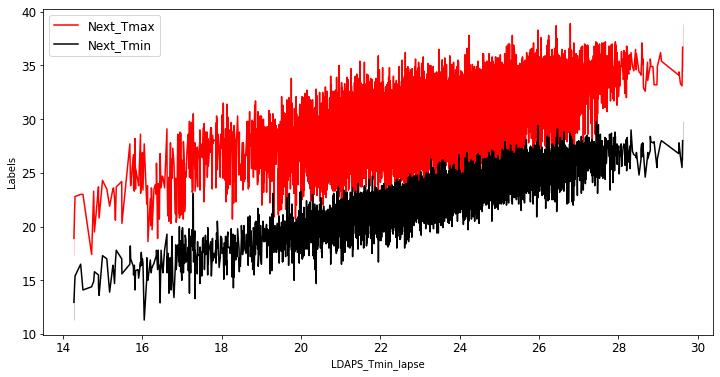

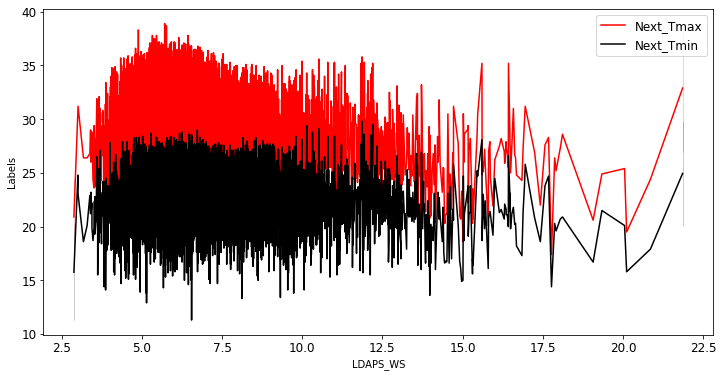

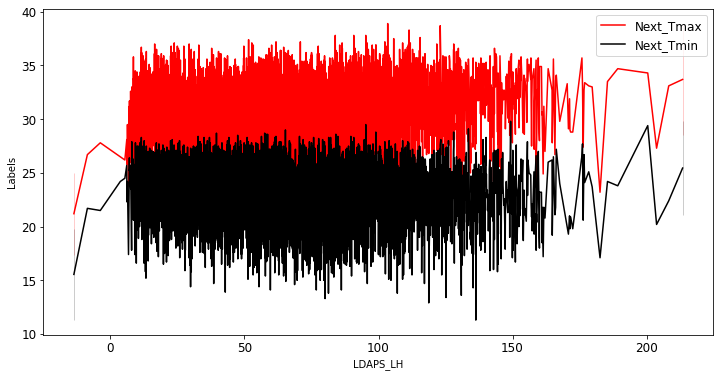

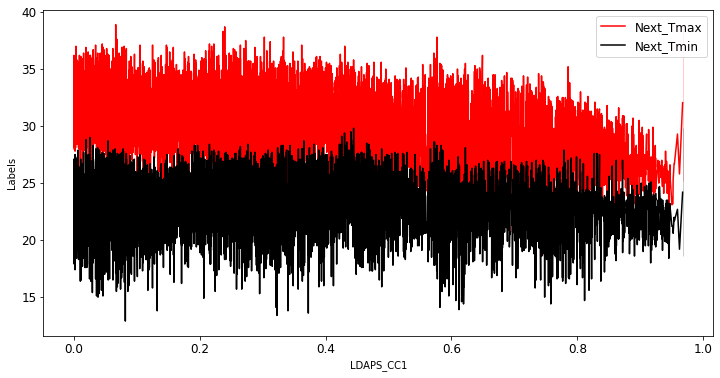

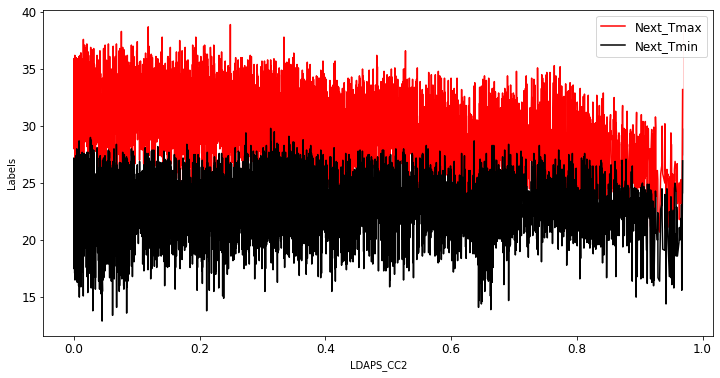

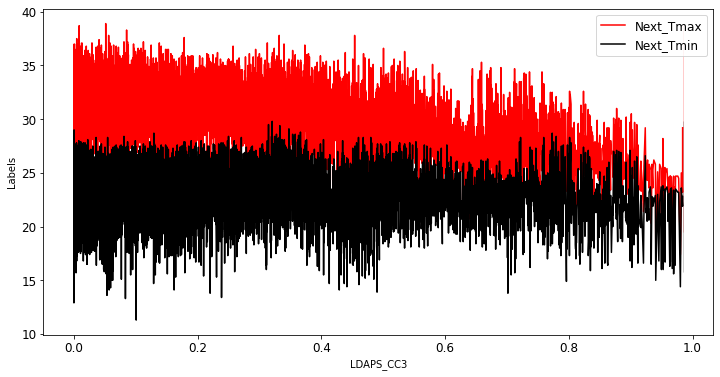

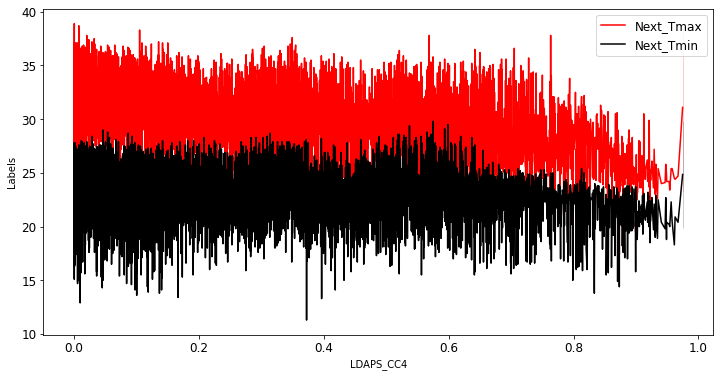

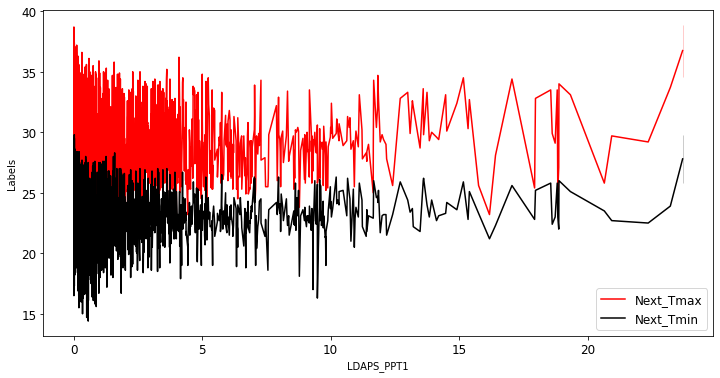

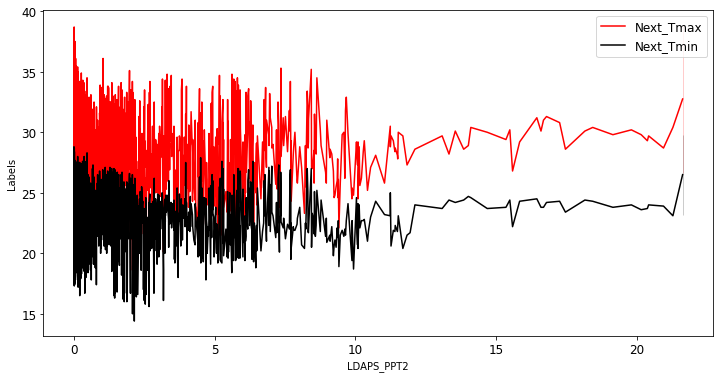

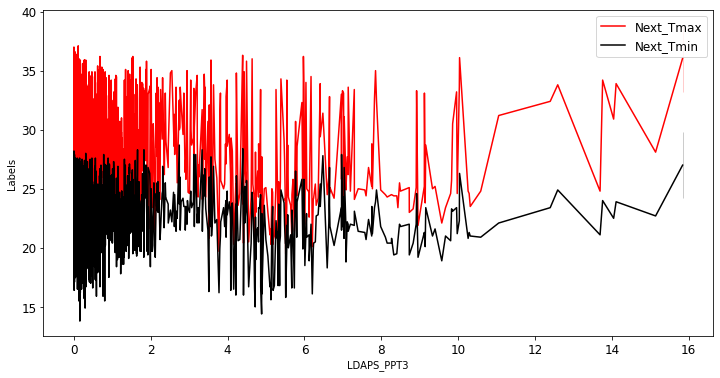

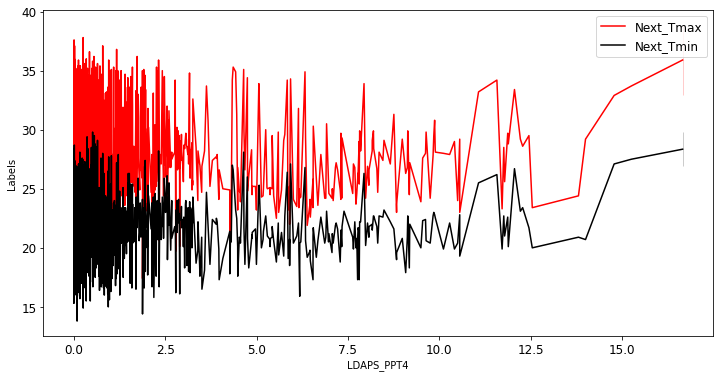

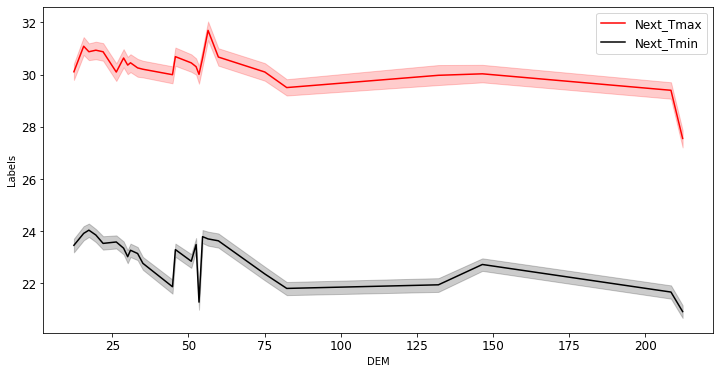

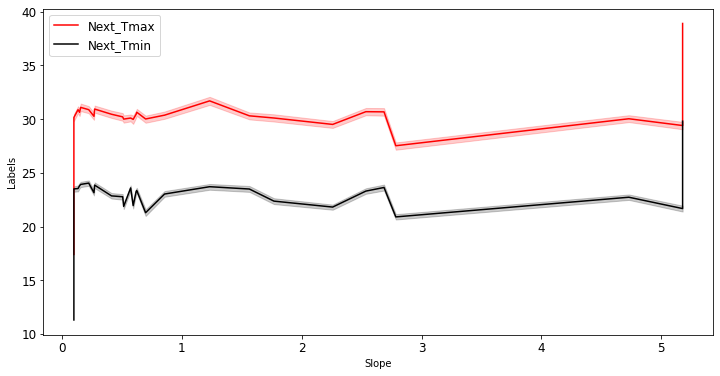

KeyboardInterrupt: 

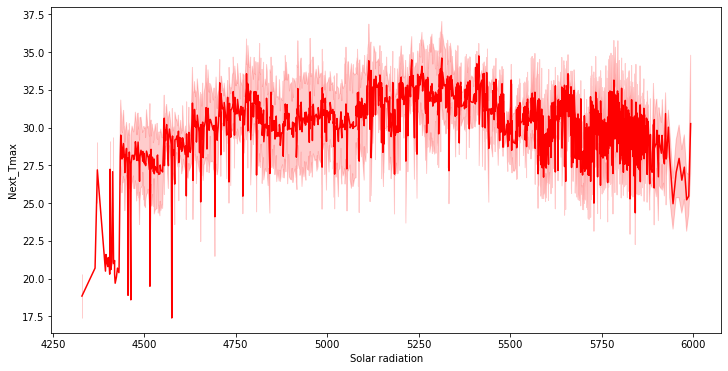

In [35]:
feature_columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
                   'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation']

label_columns = ['Next_Tmax', 'Next_Tmin']

plt.style.use('seaborn-dark-palette')

for z in df[feature_columns]:
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df[z], y=label_columns[0],color='red', data=df)
    sns.lineplot(x=df[z], y=label_columns[1],color='black', data=df)
    plt.ylabel("Labels")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['Next_Tmax', 'Next_Tmin'], fontsize=12)
    plt.show()

With the help of above line plots we are able to see the data distribution between our feature columns with respect to our label values.

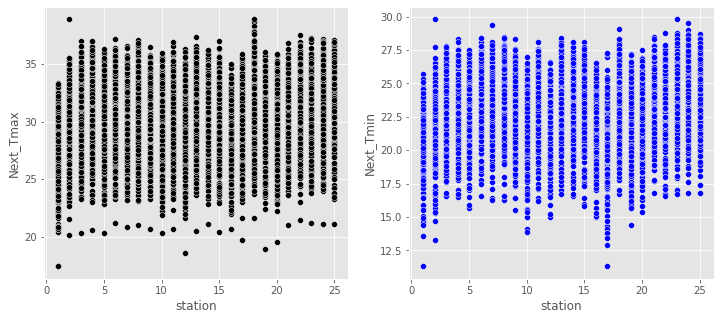

In [37]:
#scatterplot for station vs Next_Tmax and Next_Tmin 
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'station', y = 'Next_Tmax',color='black', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'station', y = 'Next_Tmin',color='blue', data = df)
plt.show()

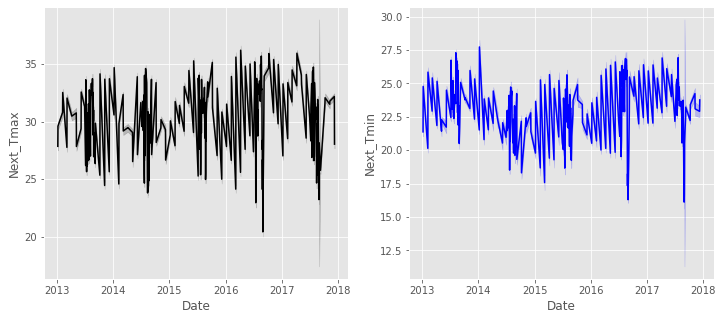

In [38]:
#lets plot lineplot for Date vs Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'Date', y = 'Next_Tmax',color='black', data = df)
plt.subplot(1, 2, 2)
sns.lineplot(x = 'Date', y = 'Next_Tmin',color='blue', data = df)
plt.show()

Above plot represents Date vs Next_Tmax and Next_Tmin, it seems like there is a small drop in temperature in both the cases between 2016 to 2017 and 2017 to 2018 is observed.

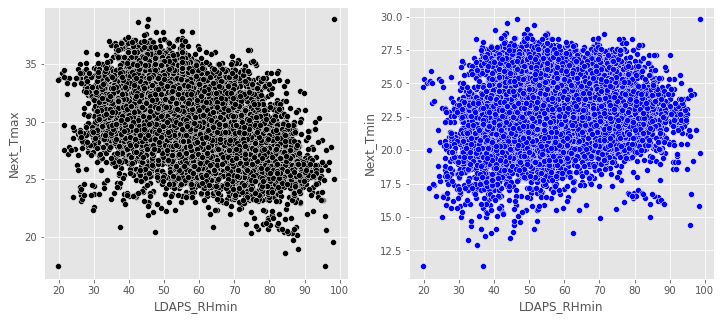

In [39]:
# lets see relation between LDAPS_RHmin with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmax',color='black', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmin',color='blue', data = df)
plt.show()

Column LDAPS_RHmin contains data of forecast of next-day minimum relative humidity in percentage(%).

It seems little poor relation between LDAPS_RHmin and Next_Tmax & Next_Tmin. In case of Next_Tmax as LDAPS_RHmin increses Next_Tmax goes down.

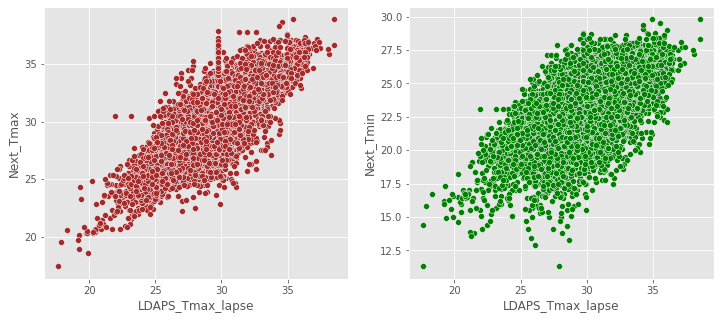

In [43]:
#lets plot scatterplots for LDAPS_Tmax_lapse with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmax',color='brown', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmin',color='green', data = df)
plt.show()

LDAPS_Tmax_lapse is forecast of next-day maximum air temperature applied lapse rate.

We can see LDAPS_Tmax_lapse is directly related to both target variables. As in contains data related to maximum temperature it is strongly related with Next_Tmax than Next_Tmin.

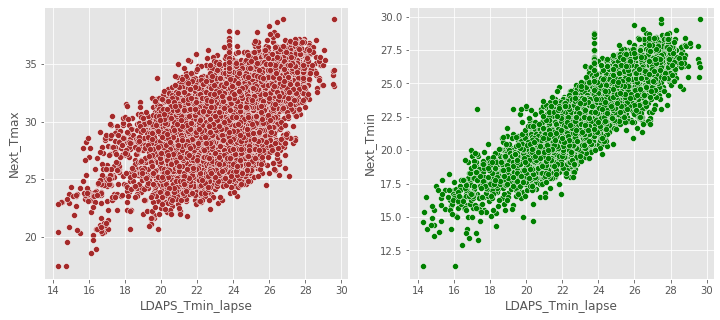

In [44]:
#lets plot scatterplot for LDAPS_Tmin_lapse with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmax',color='brown', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmin',color='green', data = df)
plt.show()

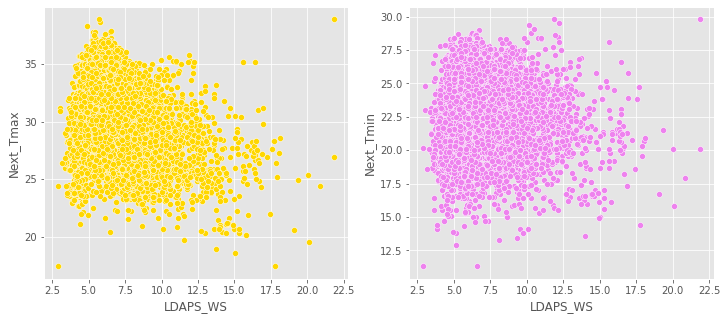

In [50]:
#check relation of LDAPS_WS with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmax',color='gold', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmin',color='violet', data = df)
plt.show()

LDAPS_LH represents LDAPS model forecast of next-day average latent heat flux (W/m2).

No any relation is observed in both the cases. We can say the LDAPS_LH is mostly distributed in the range of 10 to 150 W/m2.

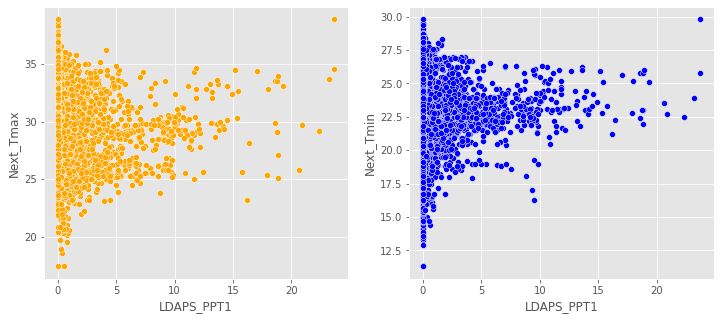

In [52]:
#lets have a look on relation of LDAPS_PPT1 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmax',color='orange', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmin',color='blue', data = df)
plt.show()

LDAPS_PPT1 represents LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h)in percentage.

here we can see LDAPS_PPT1 is mostly in between 0-5%, as it goes above 5% the Next_Tmax is above 23 degree.

In case of of Next_Tmin as LDAPS_PPT1 goes above 5% the Next_Tmin is above 17.5 degree.

# Heatmap for checking correlation

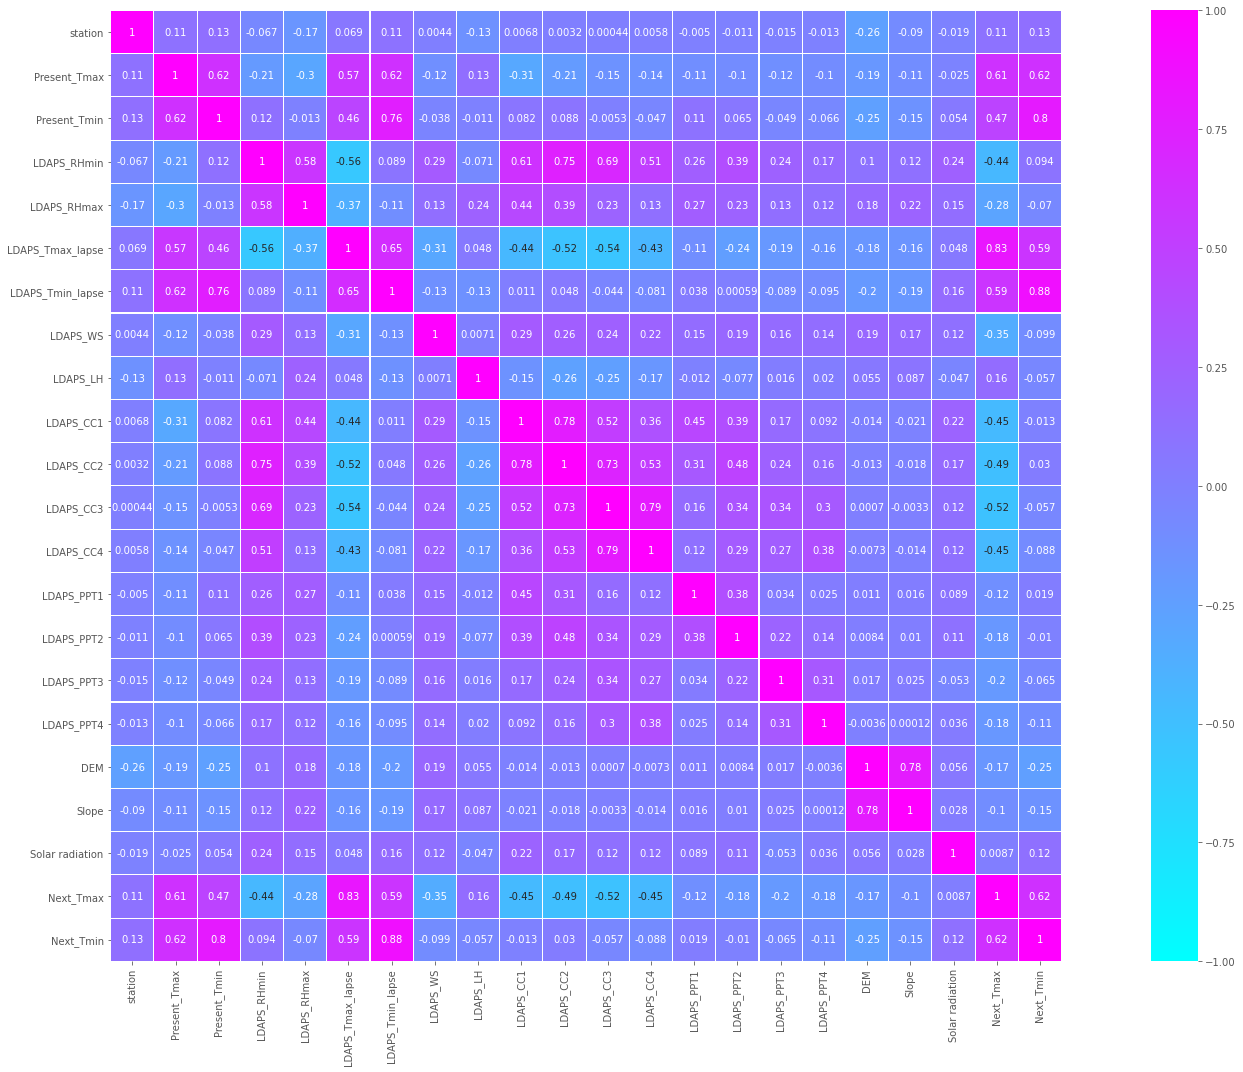

In [57]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,cmap='cool',center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()


# Plotting boxplots for checking outliers

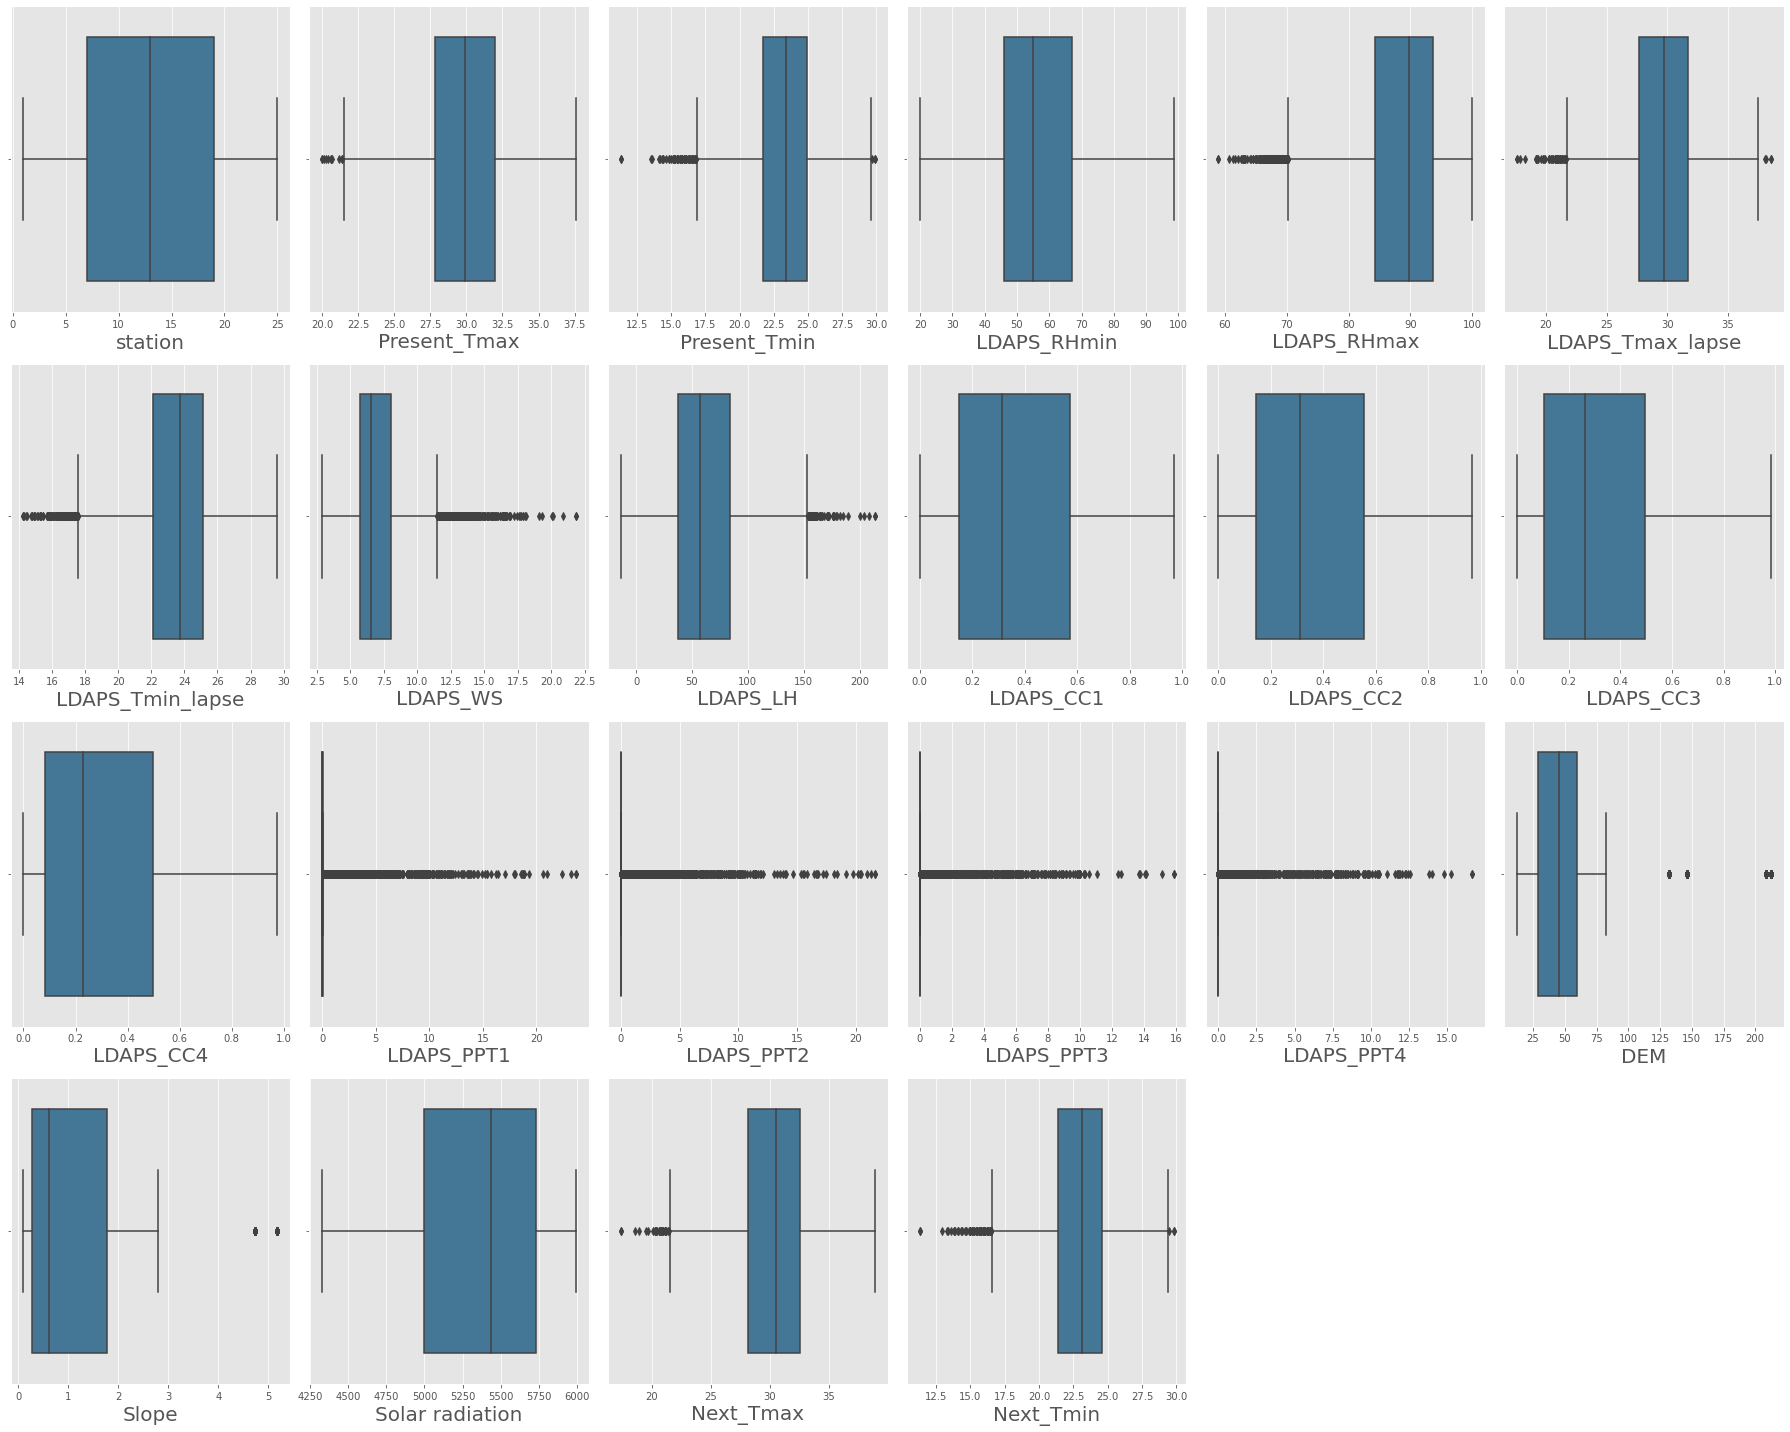

In [59]:
#Lets have a look on distribution of continuous parameters
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df:
    if column != 'Date':
        if plotnumber <=24:
            ax = plt.subplot(4,6,plotnumber)
            sns.boxplot(df[column],palette='mako')
            plt.xlabel(column,fontsize = 20)
        plotnumber+=1
plt.tight_layout()

Here we observe many columns with outliers, we will remove these outliers using zscore method.

Much outliers are observed in columns representing precipitation but we will not remove outliers from these column,because it may be its property which will give good results with these values.

# Skew

In [60]:
#lets check for skewness
df.skew()

station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

# zscore method

In [61]:
#remove outliers by applying zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','DEM','Slope']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [62]:
#drop the index column
df.drop(columns = 'index', inplace = True)
#lets check the skewness again
df.skew()

station             0.004649
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            1.028177
LDAPS_LH            0.599506
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.644503
LDAPS_CC4           0.680612
LDAPS_PPT1          5.277403
LDAPS_PPT2          5.729713
LDAPS_PPT3          6.705847
LDAPS_PPT4          6.819695
DEM                 1.775148
Slope               1.600877
Solar radiation    -0.501098
Next_Tmax          -0.268366
Next_Tmin          -0.270784
dtype: float64

# Encoding it

In [63]:
#lets convert data in column 'Date' into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [64]:
x = df.drop(columns = 'Next_Tmax')
y = df['Next_Tmax']

In [66]:
#Lets treat the skewness in features
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.cbrt(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [67]:
#check for skewness again
x.skew()

station             0.004649
Date                0.011548
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            0.576039
LDAPS_LH           -0.312649
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.191622
LDAPS_CC4          -0.454967
LDAPS_PPT1          1.989819
LDAPS_PPT2          2.317437
LDAPS_PPT3          2.637855
LDAPS_PPT4          2.956772
DEM                 0.943008
Slope               0.626847
Solar radiation    -0.501098
Next_Tmin          -0.270784
dtype: float64

# StandardScaler

In [70]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X,columns = x.columns)
X

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmin
0,1.247901,-0.953143,0.756042,-0.527590,-1.137224,-1.905757,0.614362,-0.267122,-0.423117,1.134581,...,0.789830,0.351946,-0.550835,-0.501915,0.730576,0.258020,-0.913981,-1.232800,1.142661,-0.272012
1,1.664548,1.269905,-0.144370,1.291944,-0.046704,-0.669202,0.684526,0.400391,-0.407381,-2.502234,...,-0.353403,-0.434172,-0.550835,-0.501915,-0.478786,-0.419023,-1.023155,-0.846883,0.802060,0.320111
2,0.970136,-0.795958,0.098049,-0.354301,0.277952,1.615876,0.189022,-0.480385,0.781780,0.305170,...,-1.165840,-0.515809,-0.486931,-0.501915,-0.478786,-0.419023,1.652404,2.065106,0.961002,0.362406
3,-0.140924,-1.009281,0.894567,-0.354301,-0.873451,-1.360993,1.820066,1.408850,2.779511,0.176838,...,0.311489,0.931486,-0.197403,-0.247709,-0.478786,1.654183,1.466410,-0.302385,0.254194,1.504357
4,0.692371,0.270656,0.513623,-0.267656,-0.939800,-0.913399,1.116108,-0.030586,-0.700085,0.735195,...,0.345041,-0.556993,-0.550835,-0.501915,-0.478786,-0.419023,0.161034,0.351708,1.062412,0.193228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,1.525666,0.338021,-0.663839,0.512144,1.622612,0.656699,-1.509982,-0.383665,2.940856,0.681581,...,1.357625,1.253735,1.803405,0.890559,0.277431,2.537268,-1.136732,-0.964322,0.950079,-0.652662
7479,-0.696454,-0.492815,-0.490682,0.338855,-0.408828,-1.835809,-0.163216,-0.067833,0.125323,-0.241424,...,-0.510120,0.088550,-0.550835,-0.501915,-0.478786,-0.168298,0.066441,0.602121,-1.688699,-0.272012
7480,0.553488,1.584276,-0.629207,0.512144,-1.317593,1.256855,-0.012524,-1.143032,-0.777523,1.855277,...,-1.399614,-1.161956,-0.550835,-0.501915,-0.478786,-0.419023,0.089825,-0.171226,-1.552676,-2.302147
7481,-0.140924,1.258678,-0.594576,-0.614234,0.576894,-0.139097,0.175836,0.820337,0.258348,-1.929703,...,0.783995,0.756573,-0.550835,-0.501915,-0.478786,-0.419023,1.466410,-0.302385,0.996204,-0.229717


# Best randomstate

In [71]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.7806154479273755 on Random State 2


In [72]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = 2)

# >Model Building

In [77]:
# Regression Model Function

def reg(model, X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=43)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [102]:
# Linear Regression Model

model=LinearRegression()
LR=reg(model, X, y)

RMSE Score is: 1.4145273722039027
R2 Score is: 77.11914571829107
Cross Validation Score: 76.90057577197139
R2 Score - Cross Validation Score is 0.21856994631967552


In [80]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, y)

RMSE Score is: 1.4133872981374311
R2 Score is: 77.15601365993054
Cross Validation Score: 76.86931314096383
R2 Score - Cross Validation Score is 0.2867005189667111


In [82]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, y)

RMSE Score is: 1.829318086181407
R2 Score is: 61.73268599164443
Cross Validation Score: 60.946272066786314
R2 Score - Cross Validation Score is 0.7864139248581168


In [83]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, y)

RMSE Score is: 1.9489571551261384
R2 Score is: 56.56357162944583
Cross Validation Score: 56.368137542520955
R2 Score - Cross Validation Score is 0.19543408692487674


In [84]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, y)

RMSE Score is: 1.858336276161246
R2 Score is: 60.508999821011145
Cross Validation Score: 58.47691149498571
R2 Score - Cross Validation Score is 2.0320883260254377


In [85]:
# K Neighbors Regressor

model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, y)

RMSE Score is: 1.0653474828522704
R2 Score is: 87.02127316618437
Cross Validation Score: 87.30804312773736
R2 Score - Cross Validation Score is -0.2867699615529915


In [86]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, y)

RMSE Score is: 0.8404491413619012
R2 Score is: 91.92258494860664
Cross Validation Score: 92.25724984142467
R2 Score - Cross Validation Score is -0.3346648928180258


##### so i choose Linear Regression Model as the best randomestate model to satisfy our need. Basically it is giving about 77% of accuracy, so we will get up with it

Linear regression doesn't need to be tunned

# Model Saving

In [103]:
import joblib
joblib.dump(LR,"Temperature prediction_final.pkl")

['Temperature prediction_final.pkl']